#### 사전준비

In [51]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [54]:
# 머신러닝 패키지 import
import statsmodels.api as sm #안쓸듯
import sklearn as sk

#### 농어 데이터 준비

In [55]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#### 훈련세트 / 테스트세트 분리

In [57]:
from sklearn.model_selection import train_test_split

# 훈련세트 / 테스트세트 분리
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [58]:
# 훈련 입력 세트 / 테스트 입력 세트 2차원으로 변경
new_train_input = np.row_stack((train_input))
new_train_input.shape

(42, 1)

In [59]:
# 테스트 입력 세트
new_test_input = np.row_stack((test_input))
new_test_input.shape

(14, 1)

##### 모델 훈련

In [60]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# knr.n_neighbors = 3

In [61]:
knr.fit(X=new_train_input, y=train_target)

KNeighborsRegressor(n_neighbors=3)

In [62]:
# 결정계수 확인
knr.score(X=new_train_input, y=train_target)

0.9804899950518966

In [63]:
knr.score(X=new_test_input, y=test_target)

0.9746459963987609

In [64]:
# 길이가 50cm일때 무게가 얼마로 예측될까요?
knr.predict([[50.0]])

array([1033.33333333])

In [65]:
knr.predict([[50.0]])[0]

1033.3333333333333

#### 얼레?? 무게가 1500g이 넘는데?
(머신러닝 모델 쓰X기 아님?)

##### 훈련 세트에 대한 산점도

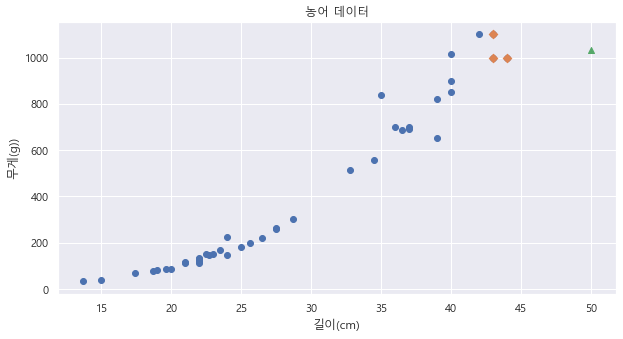

In [66]:
# 길이 50cm 농어에 대한 이웃값 3개를 구한 것 -> 100으로 변경해서 해도 결과가 같음
dist, inds = knr.kneighbors([[50.0]])
    #knr.n_neighbors = 3

plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
plt.scatter(x=new_train_input[inds], y=train_target[inds], marker="D")
plt.scatter(x=50, y=knr.predict([[50.0]])[0], marker="^")

plt.title("농어 데이터")
plt.xlabel("길이(cm)")
plt.ylabel("무게(g))")
plt.show()

##### 이웃(3개) 평균

In [67]:
train_target[inds]

array([[1000., 1000., 1100.]])

In [68]:
np.mean(train_target[inds])
#50에 대한 예측값과 동일

1033.3333333333333

In [69]:
# 길이를 100cm로해도 무게는 동일하게 나온다
knr.predict(X=[[100]])

array([1033.33333333])

##### => 이 방법을 사용하면 원하는 결과를 얻을 수 없다는 뜻

#### 선형 회귀 Linear Regression

가장 대표적인 회귀 알고리즘 (비교적 간단하고 정확)

In [70]:
# KNN X -> LinearRegression 사용
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [71]:
# 선형회귀 모델로 훈련
lr.fit(X=new_train_input, y=train_target)

LinearRegression()

In [72]:
# 훈련데이터 결정계수 확인
lr.score(X=new_train_input, y=train_target)

0.939846333997604

In [73]:
# 테스트데이터로 결정계수 확인
lr.score(X=new_test_input, y=test_target)

0.8247503123313558

In [49]:
# 길이 50cm 예측
lr.predict([[50.0]])
# 1033.3333(KNN) VS 1241.8386(Linear Reg)
# 460g VS 260g

array([1241.83860323])

In [50]:
# 1차 방정식의 값을 도출
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- coef_(계수) = 가중치(weight) = 기울기
- intercept_(절편) = 잔차(error)

##### Linear Regression 산점도

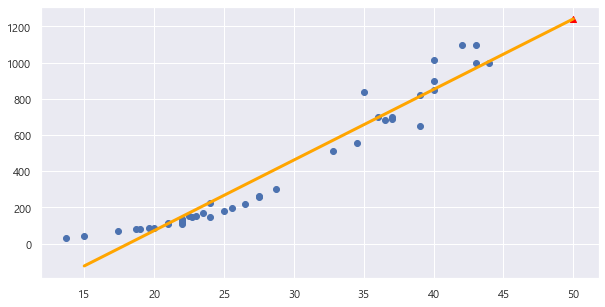

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)
plt.scatter(x=50, y=lr.predict([[50]]), marker="^", color="red")

# 1차방정식 선그래프
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_],
         color="orange", linewidth="3.0")
plt.plot
plt.show()

#### 다항회귀

In [47]:
train_poly = np.column_stack((new_train_input ** 2, new_train_input))
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [46]:
test_poly = np.column_stack((new_test_input ** 2, new_test_input))
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [49]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


#### 다항 선형회귀

In [50]:
lr = LinearRegression()
lr.fit(X=train_poly, y=train_target)

LinearRegression()

In [51]:
# 훈련데이터로 결정계수 확인
lr. score(X=train_poly, y= train_target)

0.9706807451768623

In [52]:
#테스트데이터로 결정계수 확인
lr.score(X=test_poly, y=test_target)

0.9775935108325121

In [56]:
# 길이 50cm 농어의 무게 예측
# 길이의 제곱, 길이
lr.predict([[50.0 ** 2, 50.0]])
#농어의 무게 예측 = 1573.98g

array([1573.98423528])

In [59]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


In [61]:
# a * 길이 * 길이 + b + 길이 + c
# a = 1.0143
# b = -21.5579
# c = 116.0502
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


In [66]:
lr.coef_[0]

1.0143321093767304

In [67]:
lr.coef_[1]

-21.557924978837356

#### 다항 회귀 산점도

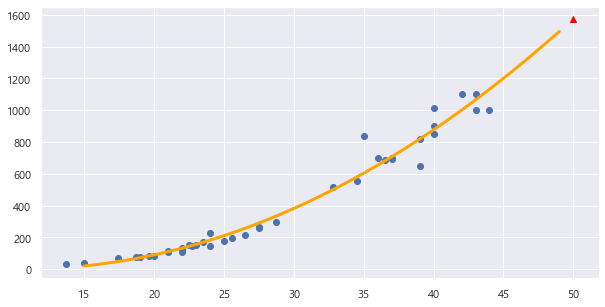

In [69]:
from turtle import color


point = np.arange(15,50)

plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input, y=train_target)

# 15~49까지의 2차 방정식 그림
plt.plot(point, lr.coef_[0]*(point**2) + lr.coef_[1]*point + lr.intercept_,
         color="orange", linewidth="3.0")

plt.scatter(x=[50.0], y=lr.predict([[50.0**2, 50.0]]), marker="^", color="red")

plt.show()